# Linear regression without using Sklearn using batch gradient descent
Linear regression is one of the simplest machine learning models, but understanding the algorithm lays the foundation for understanding more complex algorithms. In a machine learning context, the algorithm can be broken down into the following steps:
- Create a cost function
- Find the derivative of the cost function
- Apply gradient descent to optimize the parameters
- Take the dot product of the test features and the optimized parameters to find the predicted target values

All machine learning models involve minimizing some cost function, and this is generally done with gradient descent. Gradient descent is an iterative process where the parameters are gradually tuned by finding the derivative of the cost function which gives us the direction of greatest descent of the cost function. In this tutorial, I will show the steps to build a linear regression model without relying on prebuilt machine learning packages.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random

In [4]:
data = pd.read_csv("data/tvmarketing.csv")
data.head()

,TV,Sales
0,230.1,22.1
1,44.5,10.4
2,17.2,9.3
3,151.5,18.5
4,180.8,12.9


In [413]:
# split the data into train and test
data = data.sample(frac = 1, random_state=42)
train, test = data.iloc[0:int(len(data) * .8), :], data.iloc[int(len(data) * .8) + 1:, :]
x_train, y_train = np.array(train.iloc[:, train.columns != 'Sales']), np.array(train['Sales'])
x_test, y_test = np.array(test.iloc[:, test.columns != 'Sales']), np.array(test['Sales'])


In [414]:
def least_squared_error(y_pred, y):
    """Calculates least squared error for a vector of predicted and actual target values
    Parameters
    ----------
        y_pred: array
            Predicted target values
        y: array
            Actual target values
    Returns
    -------
     
       the least squared error given a vector of predicted target values and actual target values"""
    lsr = .5 * (y_pred - y)**2
    return lsr

In [415]:
def lr_cost_func(X, theta, y):
    """Calculates the cost function for linear regression
     Parameters
     ----------
        X: matrix
            The features used for prediction
        theta: array
            The coefficients multiplied against the features
        y: array
            The actual target values
    Return
    ------
        cost: float
            The value of the cost function for the given inputs
    """
    cost = (1 / (2 * len(y))) * sum((np.dot(X, theta) - y)**2)
    return cost

In [416]:
def lr_cost_deriv(X, theta, j, y):
    """Calculates the derivative of the cost function for linear regression
     Parameters
     ----------
        X: matrix
            The features used for prediction
        theta: array
            An array of coefficients to optimize
        j: int
            Iterator to indicate which feature to calculate the partial derivative for
        y: array
            The target values
    Return
    ------
        gradient: float
            The derivative of the cost function
    """    
    gradient = np.dot(np.dot(X, theta) - y, X[:, j])
    return gradient


In [417]:
def lr_gradient_descent(X, y, learning_rate, max_iter):
    """
    Perfoms batch gradient descent algorithm and returns the optimized intercept and coefficients
    Parameters
    ----------
        X: matrix
            The matrix of features
        y: array
            Array of targets
        learning_rate: float
            Indicates size of steps taken during gradient descent. Large values may not converge, small values will take longer
        max_iter: int
            The number of iterations of gradient descent to take
    Return
    ------
        intercept: float
            The intercept for the linear regression model
        coefs: aray
            An array of coefficients that can be multiplied against the features
    """
    theta = np.array([0.0 for i in range(X.shape[1])])
    theta_temp = np.array([0.0 for i in range(X.shape[1])]) #initialize an array with zeros
    for i in range(max_iter): 
        for j in range(len(theta)):
            theta_temp[j] = theta[j] - learning_rate * (1 / (len(y))) * lr_cost_deriv(X=X, theta=theta, j=j, y=y)
        theta = theta_temp
    intercept = theta[0]
    coefs = theta[1:]
    return intercept, coefs

x_train_int = np.insert(x_train, 0, 1, axis=1) # add a column of ones for the intercept
intercept, coefs = lr_gradient_descent(x_train_int, y_train, .00001, 1000) 
y_pred = np.dot(x_test, coefs) + intercept # calculate predicted values on the test set

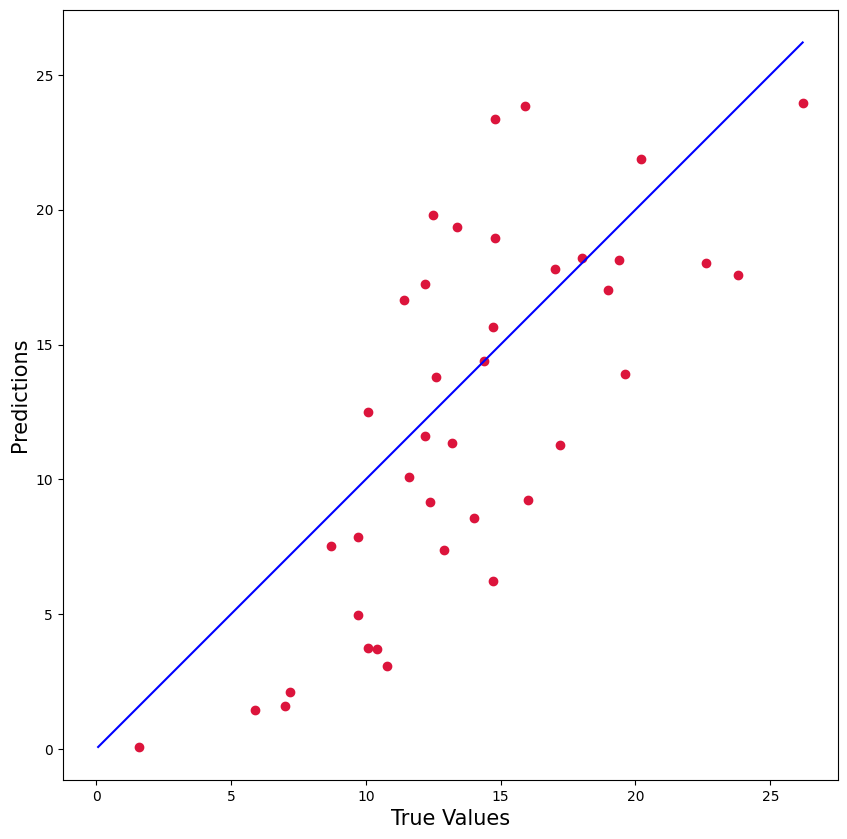

In [418]:
plt.figure(figsize=(10,10))
plt.scatter(y_test, y_pred, c='crimson')

p1 = max(max(y_pred), max(y_test))
p2 = min(min(y_pred), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.show()

In [9]:
from linear_regression_from_scratch import MachineLearningScratch
X = data['TV'].values.reshape(-1, 1)  # Reshape to a 2D array with one column
y = data['Sales'].values

lm = MachineLearningScratch()
intercept, coefs = lm.linear_regression(X=X, y=y, learning_rate=0.00001, max_iter=1000)

# Now you can predict using the coefficients obtained
y_pred = np.dot(X, coefs) + intercept

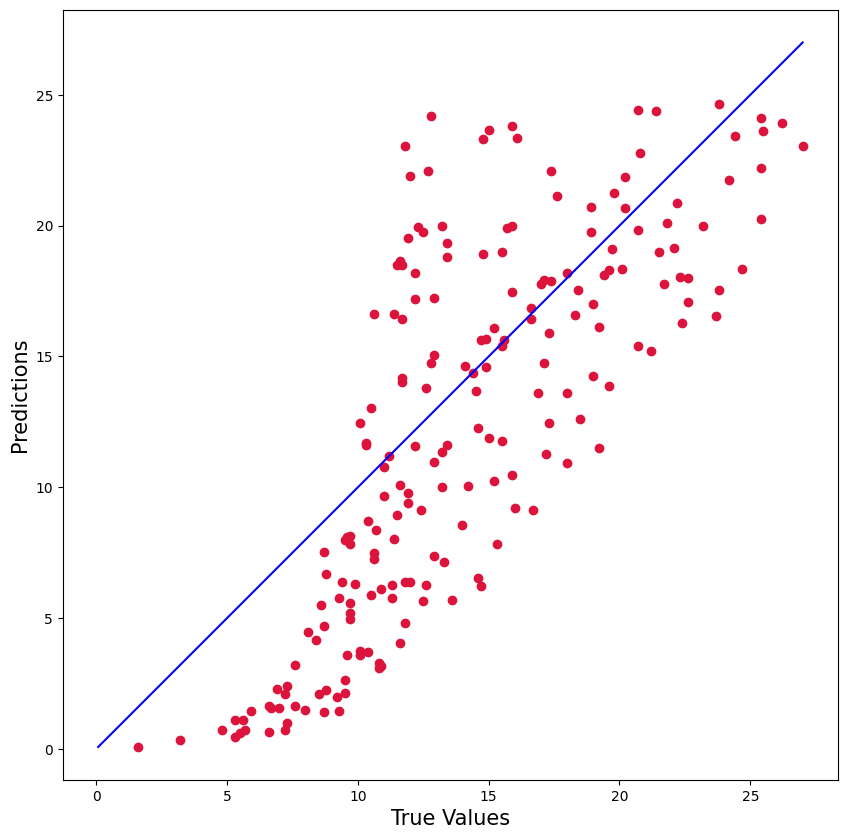

In [10]:
plt.figure(figsize=(10,10))
plt.scatter(y, y_pred, c='crimson')

p1 = max(max(y_pred), max(y))
p2 = min(min(y_pred), min(y))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.show()